# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a

last_three_a = a[-3:]

# reverse the list

a.reverse()
reverse_a = a

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
a.reverse() #set the list to the original list a

def sqr(num):
    return num **2
sqrd_list = list(map(sqr, a))

In [2]:
# create a numpy array from this list
b = a # change this
b = np.array(b)

In [3]:
# find the mean of b
np.mean(b)

3.5

In [4]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
np.square(b)

array([ 1,  4,  9, 16, 25, 36])

In [5]:
# change b from a length-6 list to a 2x3 matrix
two_three_b = b.reshape(2,3)

In [6]:
# find the mean value of each row
two_three_b.mean(axis = 1)

array([2., 5.])

In [7]:
# find the mean value of each column
two_three_b.mean(axis = 0)

array([2.5, 3.5, 4.5])

In [8]:
# find the third column of b
two_three_b[:,2]

array([3, 6])

In [9]:
# load in the "starbucks_clean.csv" dataset
df = pd.read_csv('../data/starbucks_clean.csv')

In [10]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
avg_cal = df.mean()['calories']

print("Average # calories across all item is",avg_cal_all['calories'])

NameError: name 'avg_cal_all' is not defined

In [ ]:
# how many different categories of beverages are there?
# categ_group = df.groupby(['beverage category']).size()
#categ_num = 0
# for c in categ_group:
#     categ_num += 1
categ_num = df['beverage category'].unique().size
print("There are", categ_num, "categories of beverages.")

In [ ]:
# what is the average # calories for each beverage category?
categories = df.groupby('beverage category')
avg_cal_per_category = categories.mean()['calories']
print("Below table is the average # calories for each beverage category.")
print(avg_cal_per_category)

In [ ]:
# what beverage preparation includes the most sugar on average?
#most_sugar = avg_cal_per_category.idxmax()

most_sugar = categories.mean()['sugars'].idxmax()
print(most_sugar,"is the beverage preparation includes the most sugar on average.")

In [ ]:
# what is the average % daily value calcium content for each beverage?
calc_avg_per_bev = categories.mean()['calcium']
print("The average % daily value calcium content for each beverage is shown on the below table.")
print(calc_avg_per_bev)

In [ ]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay

protein_per_bev = categories.mean()['protein']
calories_per_bev = categories.mean()['calories']

#print(protein_per_bev)
#print(calories_per_bev)

protein_over_calories = []
for i in range(len(categories)):
    temp = protein_per_bev[i] / calories_per_bev[i]
    protein_over_calories.append(temp)

#print(protein_over_calories)
    
protein_over_calories = np.array(protein_over_calories)
max_index = protein_over_calories.argmax()
goal_beverage = df['beverage category'][max_index]

print("To maximize protein but minimizes calories, Naitian should drink", goal_beverage)

# t=categories[['protein', 'calories']].agg({"protein":"max", "calories": "min"})
# print(t)



In [ ]:
# plot the distribution of the number of calories in drinks using matplotlib
#df['calories']
df['calories'].plot.hist()

In [ ]:
# plot the same distribution using seaborn. what about a density plot instead?
sns.displot(data = df, x='calories')

In [ ]:
# plot calories against total fat using seaborn
sns.jointplot(data=df, x="calories", y="total fat", kind="kde")

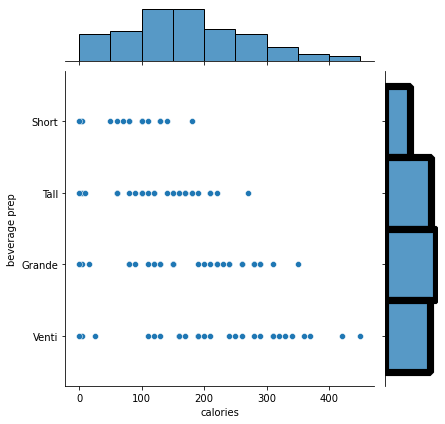

In [13]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.
new_df = df
erase_list = ['2% Milk','Soymilk','Doppio','Whole Milk', 'Solo']
#change_list = ['Short Nonfat Milk', 'Tall Nonfat Milk', 'Grande Nonfat Milk', 'Venti Nonfat Milk']

for item in erase_list:
    new_df = new_df[new_df['beverage prep'] != item]

new_df = new_df.replace({'beverage prep': 'Short Nonfat Milk'}, 'Short')
new_df = new_df.replace({'beverage prep': 'Tall Nonfat Milk'}, 'Tall')
new_df = new_df.replace({'beverage prep': 'Grande Nonfat Milk'}, 'Grande')
new_df = new_df.replace({'beverage prep': 'Venti Nonfat Milk'}, 'Venti')

sns.jointplot(data = new_df, x= 'calories', y = 'beverage prep')
# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
